# Stock Market Prediction And Forecasting Using Stacked LSTM

**Dataset: NSE-TATAGLOBAL.csv**

In [33]:
#importing all required packages and libaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading the data set which in form of link

In [34]:
df =pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

Display the data frame

In [35]:
df=df.iloc[::-1]
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [36]:
#from last row
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


To see no. of columns and rows present in dataset

In [37]:
df.shape
#columns=2035
#rows=8

(2035, 8)

#summary of dataset Display info about variables and columns

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


Show Name of columns and its types

In [39]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

Describe all df which show all data types of all columns

In [40]:
df.describe

<bound method NDFrame.describe of             Date    Open    High     Low    Last   Close  \
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
...          ...     ...     ...     ...     ...     ...   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   

      Total Trade Quantity  Turnover (Lacs)  
2034                658666           803.56  
2033                293312           355.17  
2032                281312           340.31  
2031                658440           780.01  
2030           

 #  Data Preprocessing

Check the is any null values are present or not

In [41]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

Describe the perticular columns

In [42]:
print(df["Date"].describe())

count           2035
unique          2035
top       2010-07-21
freq               1
Name: Date, dtype: object


**Check Duplicates Present Or Not**

In [43]:
duplicates= df.duplicated()
duplicates.value_counts()

False    2035
dtype: int64

**Creates a correlation heatmap to visualize the correlation between columns in a DataFrame df.**

<ipython-input-44-40557f091158>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

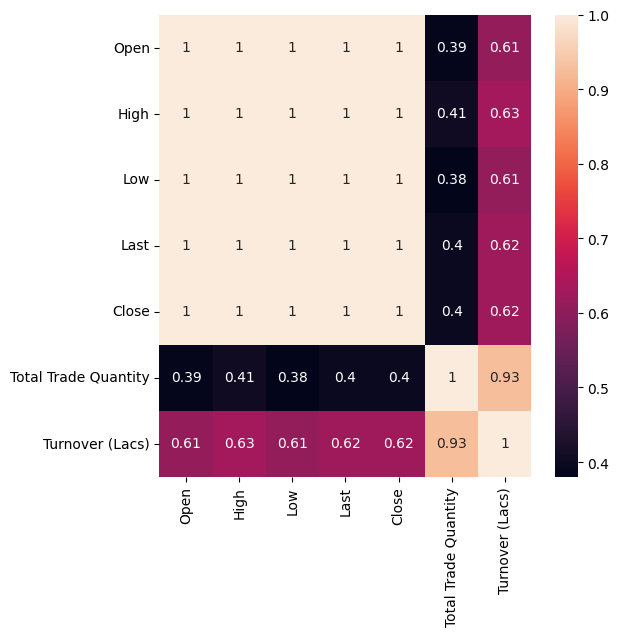

In [44]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)

**Plots the 'High' column from the DataFrame df as a line graph**

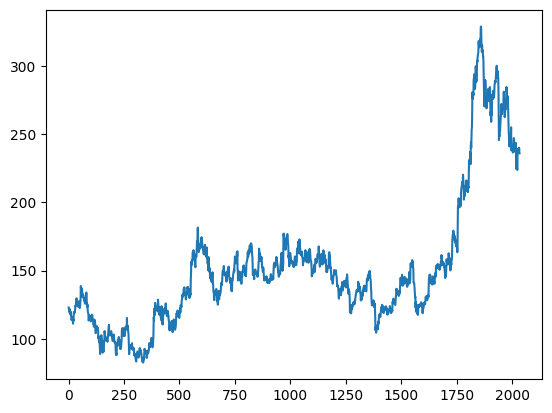

In [45]:
df_high=df.reset_index()['High']
plt.plot(df_high)

**Rescales the 'High' column of the DataFrame 'df' to have values between 0 and 1**

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [47]:
df_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

Show no of columns and rows

In [48]:
df_high.shape

(2035, 1)

# Split the data into train and test split

In [49]:
training_size = int(len(df_high) * 0.75)
test_size = len(df_high) - training_size
train_data,test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]

In [50]:
training_size, test_size

(1526, 509)

**Convert an array of values into a dataset matrix**

In [51]:
def create_supervised_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        dataX.append(dataset[i: i + time_step])
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)


In [52]:
time_step = 100
x_train, y_train = create_supervised_dataset(train_data, time_step)
x_test, y_test = create_supervised_dataset(test_data, time_step)

**Reshape the input data to a 3D format with the shape [samples, time steps, features], which is the required input format for LSTM models**

In [53]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

Now print train and test set

In [54]:
print(x_train.shape)

(1426, 100, 1)


In [55]:
 print(y_train.shape)

(1426, 1)


In [56]:
print(x_train.shape), print(y_train.shape)

(1426, 100, 1)
(1426, 1)


(None, None)

In [57]:
print(x_test.shape), print(y_test.shape)

(409, 100, 1)
(409, 1)


(None, None)

# Importing required libries

In [58]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

### Create the Stacked LSTM model





In [59]:

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


#Trains a deep learning model

In [61]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 21s 518ms/step - loss: 0.0103 - val_loss: 0.0300
Epoch 2/100
23/23 [==============================] - 11s 479ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 3/100
23/23 [==============================] - 10s 417ms/step - loss: 8.1437e-04 - val_loss: 0.0036
Epoch 4/100
23/23 [==============================] - 12s 518ms/step - loss: 7.9116e-04 - val_loss: 0.0045
Epoch 5/100
23/23 [==============================] - 11s 485ms/step - loss: 7.5509e-04 - val_loss: 0.0032
Epoch 6/100
23/23 [==============================] - 11s 479ms/step - loss: 7.0184e-04 - val_loss: 0.0035
Epoch 7/100
23/23 [==============================] - 11s 476ms/step - loss: 6.9157e-04 - val_loss: 0.0029
Epoch 8/100
23/23 [==============================] - 11s 482ms/step - loss: 6.5723e-04 - val_loss: 0.0024
Epoch 9/100
23/23 [==============================] - 12s 531ms/step - loss: 6.3809e-04 - val_loss: 0.0024
Epoch 10/100
23/23 [==============================] - 

#Predictions of test set
#Lets predict and check performance metrics

In [62]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

#Performs an inverse transformation on the predicted values (train_predict and test_predict)

In [63]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [64]:
train_predict

array([[117.39309],
       [114.94027],
       [115.73224],
       ...,
       [145.07132],
       [145.97134],
       [145.21759]], dtype=float32)

In [65]:
test_predict

array([[145.97812],
       [146.85057],
       [147.44724],
       [148.27432],
       [148.48192],
       [146.80153],
       [148.32231],
       [145.12962],
       [144.38977],
       [142.22931],
       [143.69643],
       [144.48412],
       [145.14845],
       [144.57611],
       [142.53964],
       [142.01752],
       [141.4556 ],
       [147.75157],
       [147.79208],
       [146.02527],
       [146.81409],
       [145.67839],
       [144.5532 ],
       [143.94011],
       [143.9471 ],
       [142.11658],
       [143.9283 ],
       [147.52504],
       [147.73265],
       [149.38863],
       [150.21968],
       [147.0282 ],
       [154.40082],
       [154.9792 ],
       [153.60829],
       [155.57658],
       [154.46635],
       [154.29594],
       [153.60123],
       [155.23482],
       [156.61978],
       [156.05621],
       [156.10959],
       [153.62318],
       [155.42734],
       [155.59137],
       [154.62831],
       [152.4602 ],
       [154.21896],
       [152.33762],


#Calculate MSE performance metrics

In [66]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

137.2246863039204

In [67]:
math.sqrt(mean_squared_error(y_test, test_predict))

229.24260036075165

**Plotting of Shift train prediction**

In [68]:
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

**Plotting of Shift test prediction**

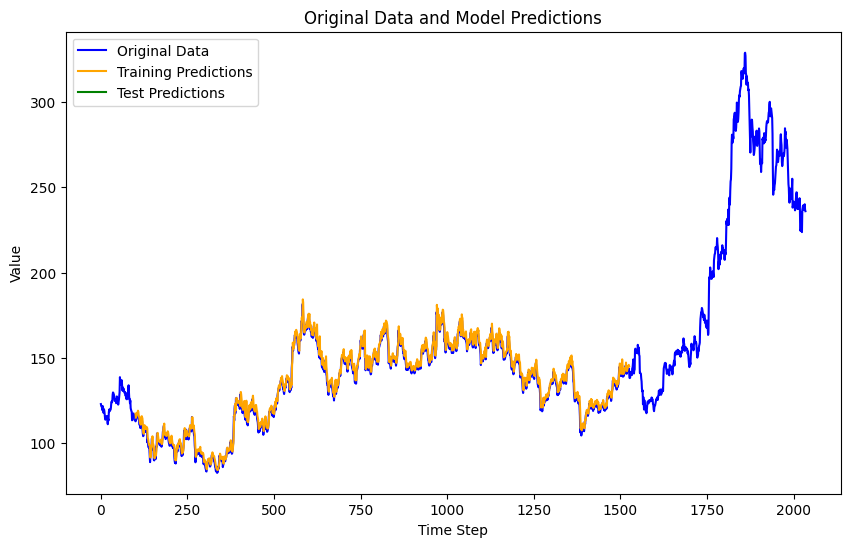

Green indicates the Test Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Predicted Data


In [72]:
import matplotlib.pyplot as plt

# Plot baseline and predictions
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(df_high), label='Original Data', color='blue')
plt.plot(trainPredictPlot, label='Training Predictions', color='orange')
plt.plot(testPredictPlot, label='Test Predictions', color='green')
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Original Data and Model Predictions')
plt.show()

print("Green indicates the Test Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Predicted Data")


**Predict the next 28 days Stock Price**

In [73]:
len(test_data), x_test.shape


(509, (409, 100, 1))

In [74]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [75]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.618301]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 0.

In [76]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [77]:
day_new.shape

(100,)

In [78]:
day_pred.shape

(28,)

In [79]:

len(df_high)

2035

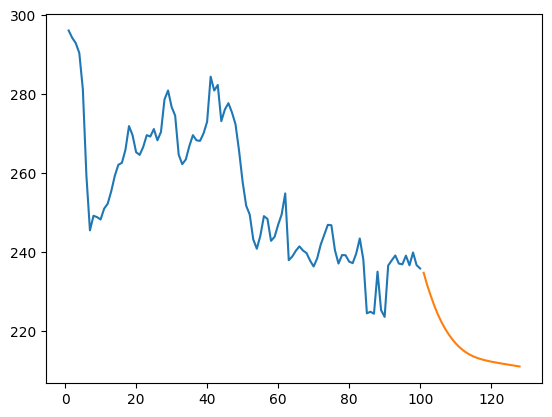

In [80]:
plt.plot(day_new, scaler.inverse_transform(df_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

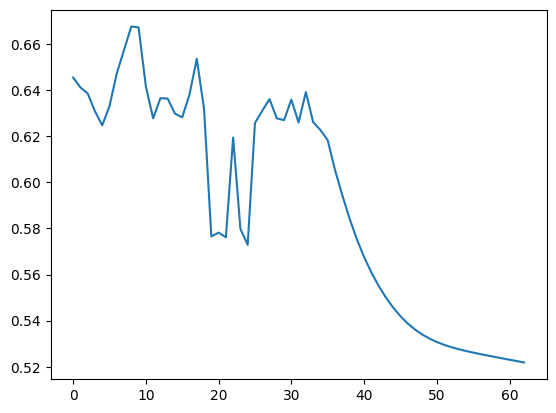

In [81]:
data_new = df_high.tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])

In [82]:
data_new =scaler.inverse_transform(data_new).tolist()

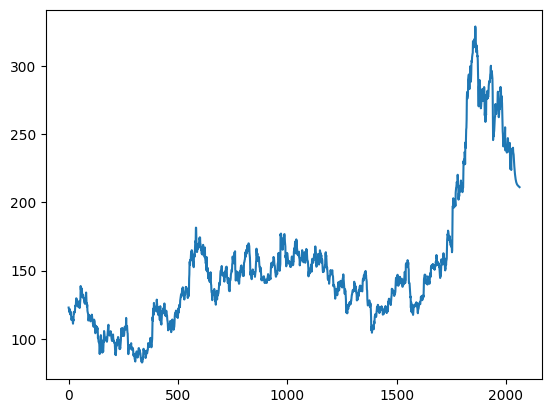

In [83]:
plt.plot(data_new)